#Asteroid size prediction

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import warnings
warnings.simplefilter(action="ignore", category=FutureWarning)

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
df=pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Asteroid_Updated.csv")
df.head()

<ipython-input-6-41f225f173bd>:1: DtypeWarning: Columns (0,10,15,16,23,24) have mixed types. Specify dtype option on import or set low_memory=False.
  df=pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Asteroid_Updated.csv")


,name,a,e,i,om,w,q,ad,per_y,data_arc,...,UB,IR,spec_B,spec_T,G,moid,class,n,per,ma
0,Ceres,2.769165,0.076009,10.594067,80.305532,73.597694,2.558684,2.979647,4.608202,8822.0,...,0.426,NaN,C,G,0.12,1.59478,MBA,0.213885,1683.145708,77.372096
1,Pallas,2.772466,0.230337,34.836234,173.080063,310.048857,2.133865,3.411067,4.616444,72318.0,...,0.284,NaN,B,B,0.11,1.23324,MBA,0.213503,1686.155999,59.699133
2,Juno,2.669150,0.256942,12.988919,169.852760,248.138626,1.983332,3.354967,4.360814,72684.0,...,0.433,NaN,Sk,S,0.32,1.03454,MBA,0.226019,1592.787285,34.925016
3,Vesta,2.361418,0.088721,7.141771,103.810804,150.728541,2.151909,2.570926,3.628837,24288.0,...,0.492,NaN,V,V,0.32,1.13948,MBA,0.271609,1325.432765,95.861936
4,Astraea,2.574249,0.191095,5.366988,141.576605,358.687607,2.082324,3.066174,4.130323,63507.0,...,0.411,NaN,S,S,NaN,1.09589,MBA,0.238632,1508.600458,282.366289


In [7]:
new_columns_dict = {'name':'obj_name','a':'semi-major_axis(au)','e':'eccentricity',
                    'i':'x-y_inclination(deg)','om':'longitude_asc_node','w':'argument_perihelion',
                    'q':'perihelion_dist(au)','ad':'aphelion_dist(au)', 'per_y':'orbital_period',
                   'data_arc':'data_arc(d)','condition_code':'condition_code','n_obs_used':'n_obs_used',
                   'H':'abs_mag_para', 'neo':'near_earth_obj', 'pha':'physically_hazardous_asteroid',
                   'diameter':'diameter','extent':'axial_ellipsoid_dim(Km)','albedo':'geo_albedo',
                   'rot_per':'rot_per(h)','GM':'std_gravitational_para','BV':'bv_color_mag_diff',
                   'UB':'ub_color_mag_diff','IR':'ir_color_mag_diff','spec_B':'SMASSII_spec_tax_type',
                   'spec_T':'Tholen_spec_tax_type','G':'mag_slope_para','moid':'earth_min_oribit_inter_dist(au)',
                   'class':'class','n':'mean_motion(deg/d)','per':'orbital_period(d)','ma':'mean_anomaly(deg)'}

df = df.rename(columns = new_columns_dict)
df.columns

Index(['obj_name', 'semi-major_axis(au)', 'eccentricity',
       'x-y_inclination(deg)', 'longitude_asc_node', 'argument_perihelion',
       'perihelion_dist(au)', 'aphelion_dist(au)', 'orbital_period',
       'data_arc(d)', 'condition_code', 'n_obs_used', 'abs_mag_para',
       'near_earth_obj', 'physically_hazardous_asteroid', 'diameter',
       'axial_ellipsoid_dim(Km)', 'geo_albedo', 'rot_per(h)',
       'std_gravitational_para', 'bv_color_mag_diff', 'ub_color_mag_diff',
       'ir_color_mag_diff', 'SMASSII_spec_tax_type', 'Tholen_spec_tax_type',
       'mag_slope_para', 'earth_min_oribit_inter_dist(au)', 'class',
       'mean_motion(deg/d)', 'orbital_period(d)', 'mean_anomaly(deg)'],
      dtype='object')

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 839714 entries, 0 to 839713
Data columns (total 31 columns):
 #   Column                           Non-Null Count   Dtype  
---  ------                           --------------   -----  
 0   obj_name                         21967 non-null   object 
 1   semi-major_axis(au)              839712 non-null  float64
 2   eccentricity                     839714 non-null  float64
 3   x-y_inclination(deg)             839714 non-null  float64
 4   longitude_asc_node               839714 non-null  float64
 5   argument_perihelion              839714 non-null  float64
 6   perihelion_dist(au)              839714 non-null  float64
 7   aphelion_dist(au)                839708 non-null  float64
 8   orbital_period                   839713 non-null  float64
 9   data_arc(d)                      824240 non-null  float64
 10  condition_code                   838847 non-null  object 
 11  n_obs_used                       839714 non-null  int64  
 12  ab

In [9]:
df.describe()

,semi-major_axis(au),eccentricity,x-y_inclination(deg),longitude_asc_node,argument_perihelion,perihelion_dist(au),aphelion_dist(au),orbital_period,data_arc(d),n_obs_used,...,rot_per(h),std_gravitational_para,bv_color_mag_diff,ub_color_mag_diff,ir_color_mag_diff,mag_slope_para,earth_min_oribit_inter_dist(au),mean_motion(deg/d),orbital_period(d),mean_anomaly(deg)
count,839712.000000,839714.000000,839714.000000,839714.000000,839714.000000,839714.000000,839708.000000,839713.000000,824240.000000,839714.000000,...,18796.000000,1.400000e+01,1021.000000,979.000000,1.00,119.000000,8.232720e+05,8.397120e+05,8.397080e+05,839706.000000
mean,2.757514,0.155636,8.949826,168.499466,181.075796,2.404728,3.385710,6.859734,5688.422331,259.191837,...,21.136772,7.821928e+00,0.769212,0.364396,-0.33,0.178739,1.423371e+00,2.374145e-01,2.505533e+03,180.659892
std,114.384959,0.093897,6.666087,103.096307,104.023854,2.233172,12.748733,252.264249,4208.177231,371.759667,...,73.131751,1.678880e+01,0.088625,0.095780,NaN,0.134603,2.250450e+00,8.095014e-02,9.213979e+04,106.562235
min,-104279.220927,0.000000,0.007546,0.000388,0.001666,0.070511,0.773684,0.000000,0.000000,2.000000,...,0.004389,2.100000e-09,0.580000,0.120000,-0.33,-0.250000,3.437640e-07,2.926897e-08,1.511339e+02,-67.136826
25%,2.385258,0.091454,4.069077,80.211400,91.041603,1.971941,2.775350,3.683928,3608.000000,50.000000,...,4.210000,1.022225e-03,0.700000,0.289000,-0.33,0.100000,9.784998e-01,1.900553e-01,1.345555e+03,86.642618
50%,2.644219,0.143655,7.257101,160.294860,181.669478,2.225510,3.037761,4.299859,5806.000000,118.000000,...,6.653000,6.192500e-01,0.743000,0.360000,-0.33,0.190000,1.237810e+00,2.292228e-01,1.570524e+03,181.517775
75%,2.996048,0.199400,12.255653,252.201519,271.521717,2.578162,3.357967,5.185985,7270.000000,296.000000,...,12.624250,6.500000e+00,0.850000,0.439000,-0.33,0.250000,1.590560e+00,2.675475e-01,1.894184e+03,274.301731
max,3043.149073,1.201134,175.188725,359.999800,359.999833,80.424175,6081.841956,167877.712688,72684.000000,9325.000000,...,3240.000000,6.262840e+01,1.077000,0.655000,-0.33,0.600000,7.950130e+01,2.381994e+00,6.131733e+07,491.618014


In [10]:
percent_missing = df.isnull().sum() * 100 / len(df)

missing_value = pd.DataFrame({'column': df.columns,'percent_missing': percent_missing})

missing_value.sort_values('percent_missing', ascending=False)

missing_value.head()

,column,percent_missing
obj_name,obj_name,97.383990
semi-major_axis(au),semi-major_axis(au),0.000238
eccentricity,eccentricity,0.000000
x-y_inclination(deg),x-y_inclination(deg),0.000000
longitude_asc_node,longitude_asc_node,0.000000


In [11]:
# Handling problematic Rows
valid_rows = df['diameter'].notnull().sum()
print("Number of valid rows are :",valid_rows)
df = df.dropna(axis=0, subset=['diameter'])
len(df.index)

Number of valid rows are : 137636


137636

In [12]:
# Handling problematic Columns
dropCols = missing_value["column"][missing_value["percent_missing"]>83.7]
df.drop(columns = dropCols , inplace = True)
df.head()

,semi-major_axis(au),eccentricity,x-y_inclination(deg),longitude_asc_node,argument_perihelion,perihelion_dist(au),aphelion_dist(au),orbital_period,data_arc(d),condition_code,n_obs_used,abs_mag_para,near_earth_obj,physically_hazardous_asteroid,diameter,earth_min_oribit_inter_dist(au),class,mean_motion(deg/d),orbital_period(d),mean_anomaly(deg)
0,2.769165,0.076009,10.594067,80.305532,73.597694,2.558684,2.979647,4.608202,8822.0,0,1002,3.34,N,N,939.4,1.59478,MBA,0.213885,1683.145708,77.372096
1,2.772466,0.230337,34.836234,173.080063,310.048857,2.133865,3.411067,4.616444,72318.0,0,8490,4.13,N,N,545,1.23324,MBA,0.213503,1686.155999,59.699133
2,2.669150,0.256942,12.988919,169.852760,248.138626,1.983332,3.354967,4.360814,72684.0,0,7104,5.33,N,N,246.596,1.03454,MBA,0.226019,1592.787285,34.925016
3,2.361418,0.088721,7.141771,103.810804,150.728541,2.151909,2.570926,3.628837,24288.0,0,9325,3.20,N,N,525.4,1.13948,MBA,0.271609,1325.432765,95.861936
4,2.574249,0.191095,5.366988,141.576605,358.687607,2.082324,3.066174,4.130323,63507.0,0,2916,6.85,N,N,106.699,1.09589,MBA,0.238632,1508.600458,282.366289


In [13]:
df.shape

(137636, 20)

In [14]:
df.dtypes

semi-major_axis(au)                float64
eccentricity                       float64
x-y_inclination(deg)               float64
longitude_asc_node                 float64
argument_perihelion                float64
perihelion_dist(au)                float64
aphelion_dist(au)                  float64
orbital_period                     float64
data_arc(d)                        float64
condition_code                      object
n_obs_used                           int64
abs_mag_para                       float64
near_earth_obj                      object
physically_hazardous_asteroid       object
diameter                            object
earth_min_oribit_inter_dist(au)    float64
class                               object
mean_motion(deg/d)                 float64
orbital_period(d)                  float64
mean_anomaly(deg)                  float64
dtype: object

In [15]:
convert = {'diameter' : float, 'condition_code': int}
df = df.astype(convert)
df.describe().T

,count,mean,std,min,25%,50%,75%,max
semi-major_axis(au),137636.0,2.814613,1.522740,0.626226,2.536714,2.750859,3.092537,3.891460e+02
eccentricity,137636.0,0.145485,0.077573,0.000489,0.089623,0.138543,0.191141,9.843482e-01
x-y_inclination(deg),137636.0,10.349182,6.835111,0.021855,5.120506,9.389963,13.738588,1.703236e+02
longitude_asc_node,137636.0,169.827629,102.713052,0.000738,82.334880,160.438430,256.268387,3.599909e+02
argument_perihelion,137636.0,181.904551,103.556464,0.004466,91.947943,183.669900,271.762261,3.599952e+02
perihelion_dist(au),137636.0,2.402609,0.516169,0.081882,2.068948,2.363897,2.685811,4.046567e+01
aphelion_dist(au),137636.0,3.226618,2.896374,0.999956,2.864438,3.167516,3.468608,7.722011e+02
orbital_period,137636.0,4.884248,25.532565,0.495569,4.040317,4.562581,5.438518,7.676743e+03
data_arc(d),137498.0,8969.818601,6165.176190,1.000000,6291.000000,7572.000000,9731.000000,7.268400e+04
condition_code,137636.0,0.485207,1.966078,0.000000,0.000000,0.000000,0.000000,9.000000e+00


<Axes: >

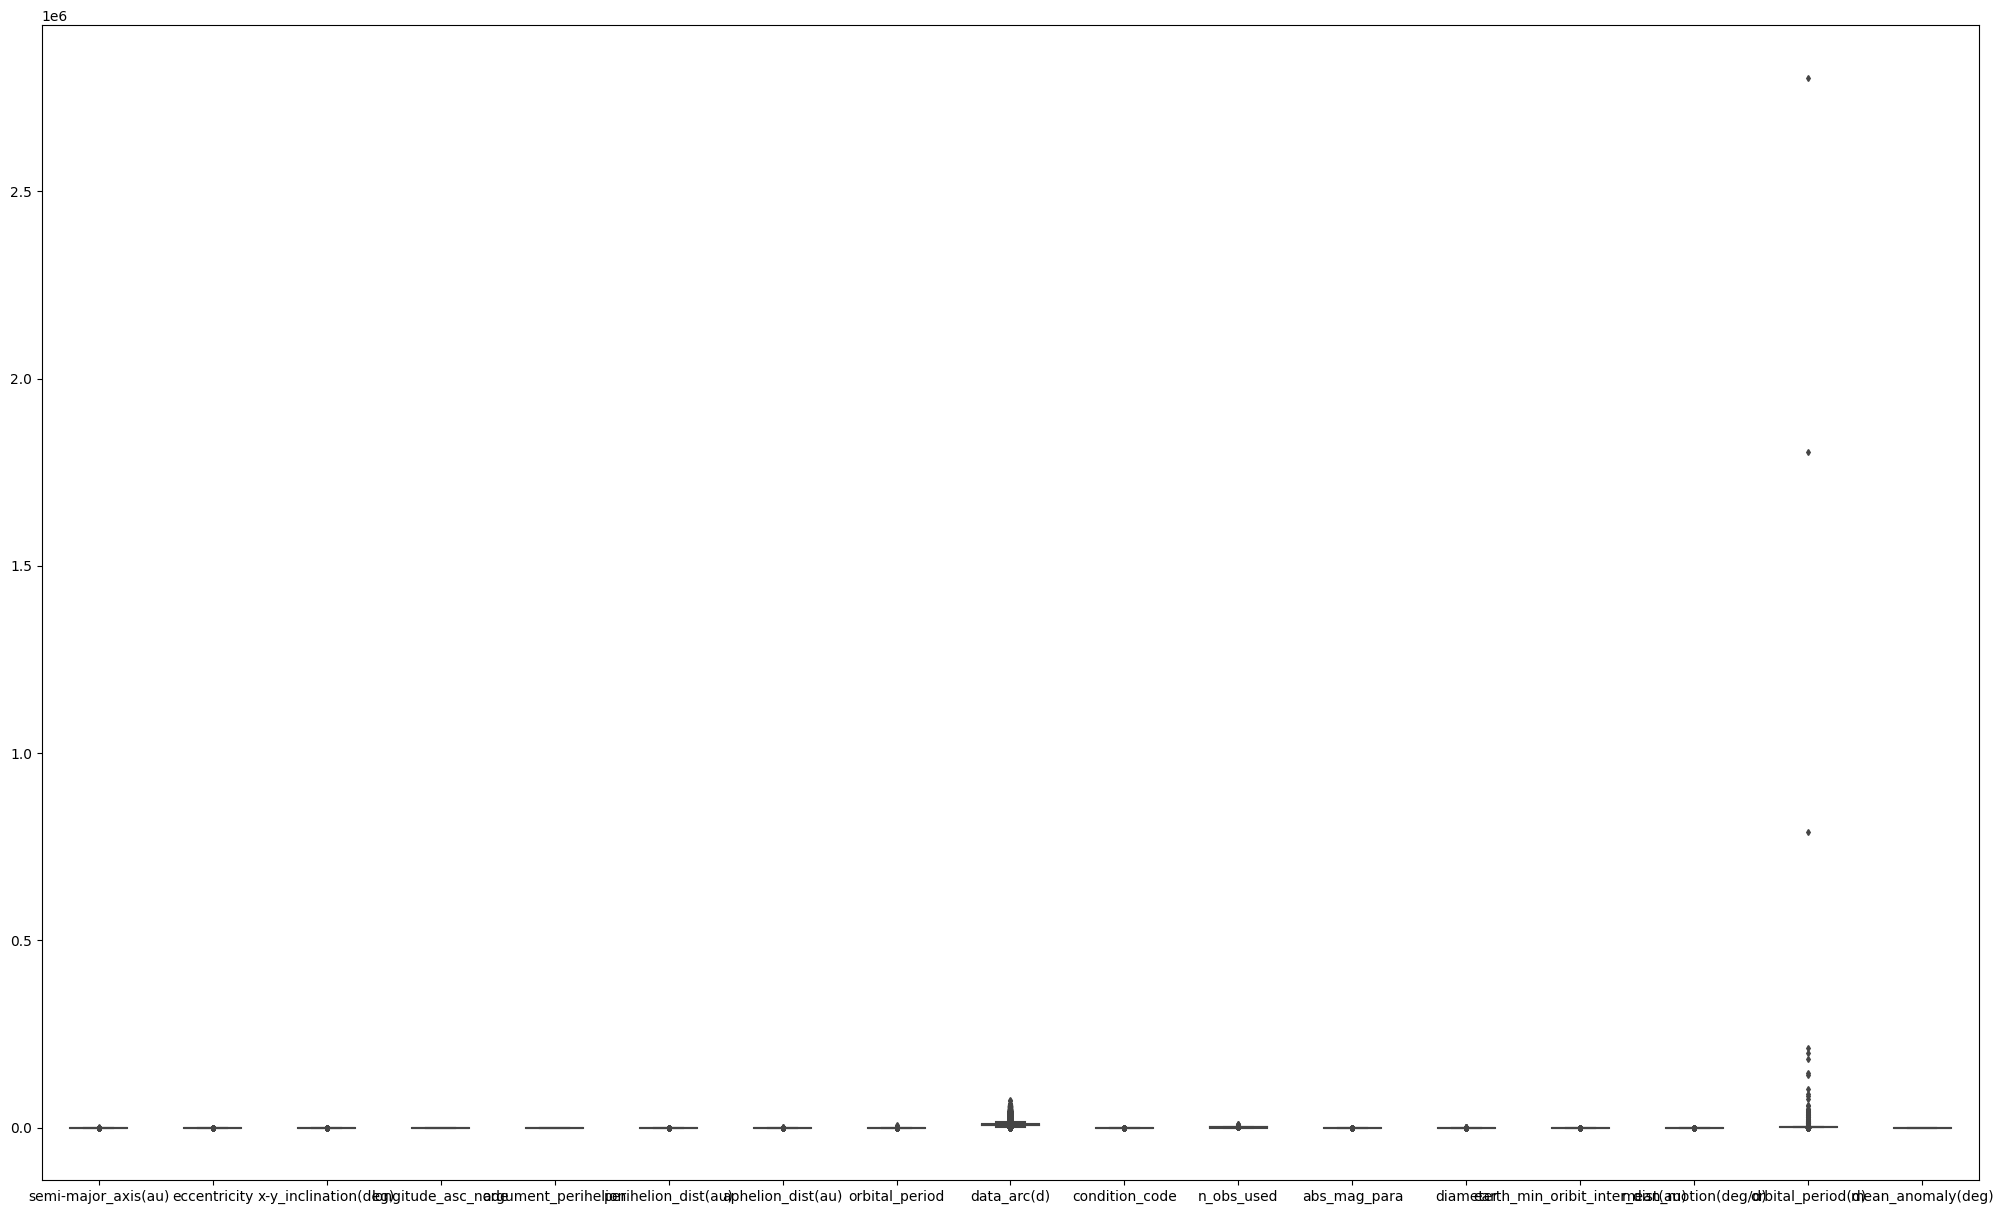

In [16]:
fig, ax = plt.subplots(figsize=(25,15))
sns.boxplot(data=df, width= 0.5,ax=ax,  fliersize=3)

<Axes: >

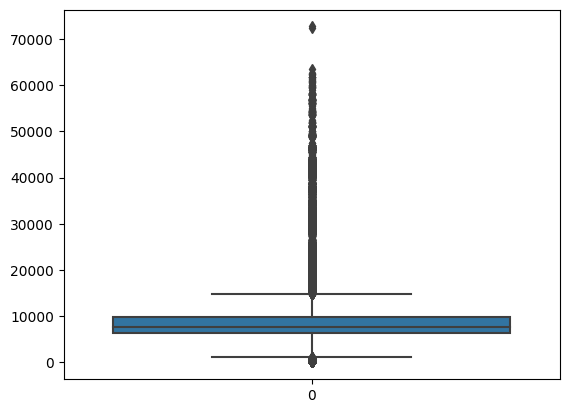

In [17]:
sns.boxplot(df['data_arc(d)'])


<Axes: >

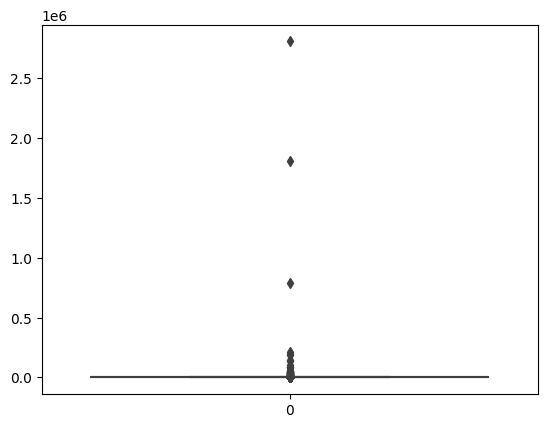

In [18]:
sns.boxplot(df['orbital_period(d)'])


In [19]:
df['data_arc(d)'] = df['data_arc(d)'].fillna(df['data_arc(d)'].median())

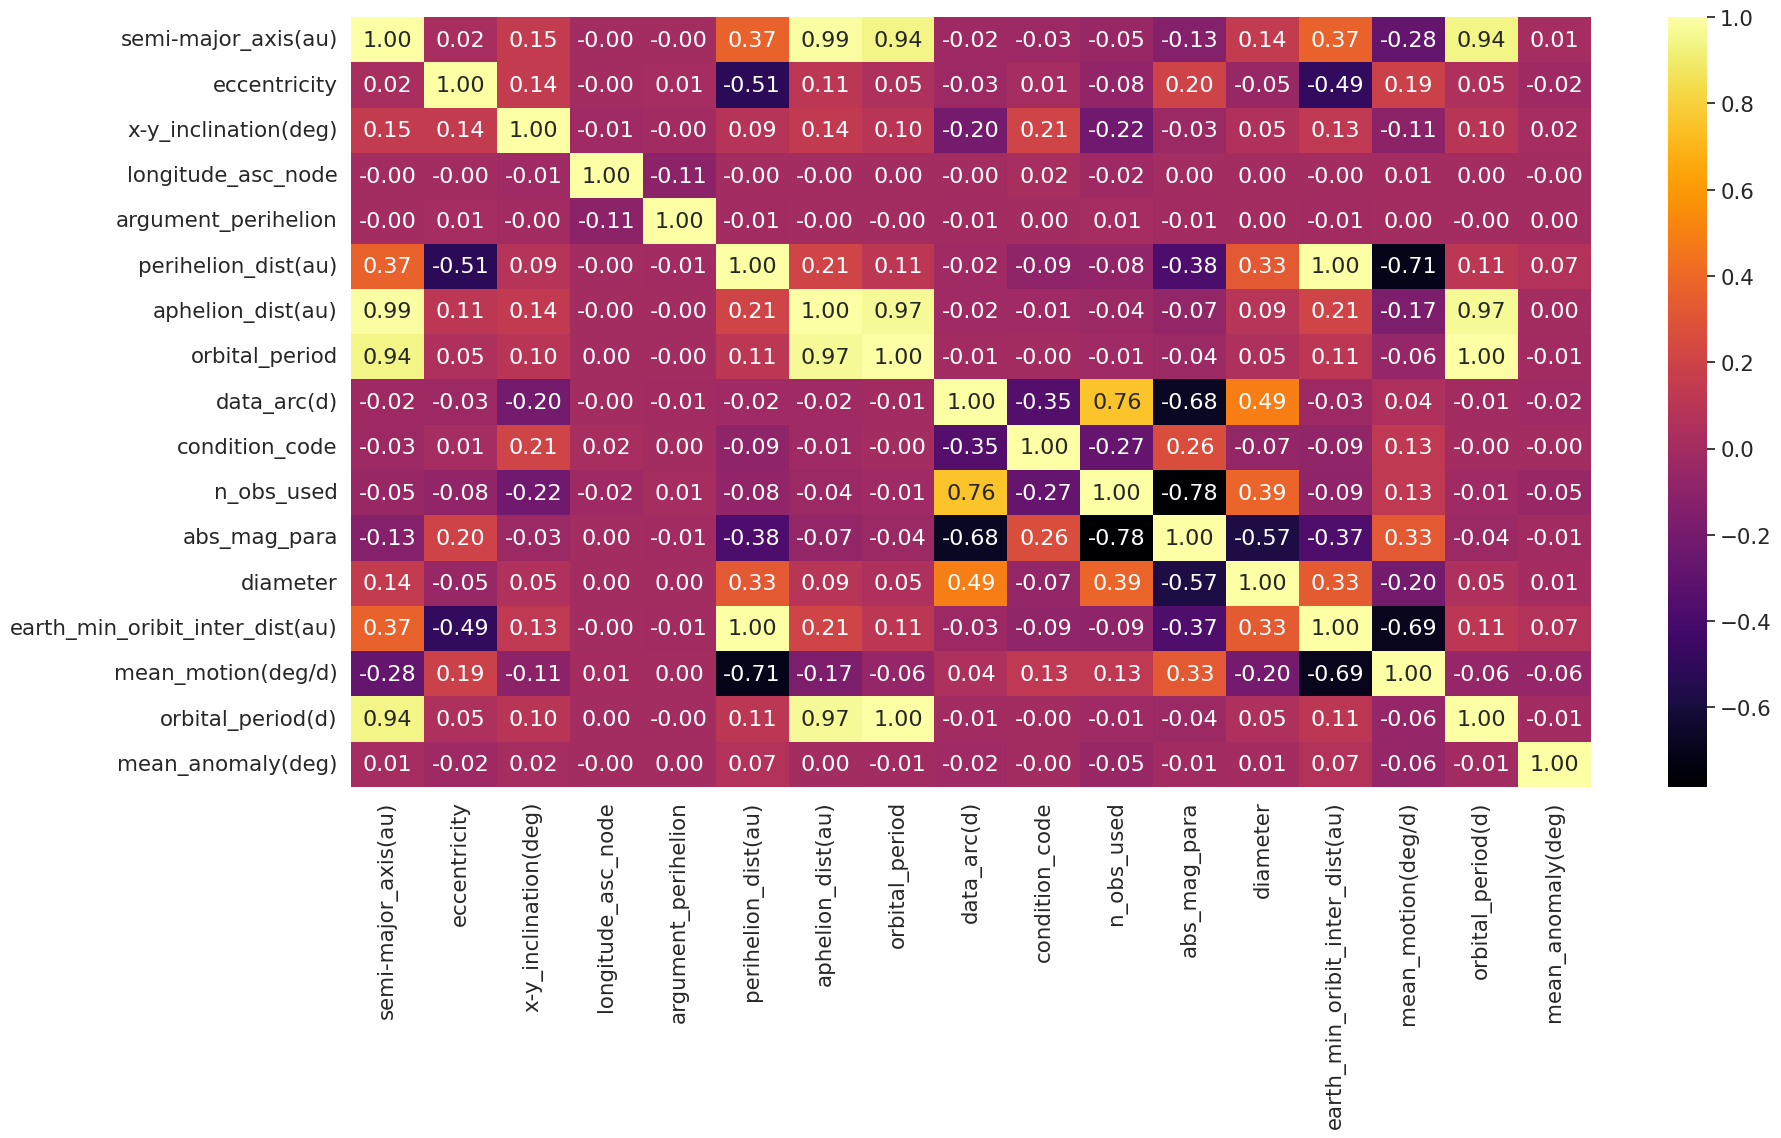

In [20]:
plt.figure(figsize=(20,10))
sns.set(font_scale=1.4)
sns.heatmap(df.corr(),annot=True, cmap='inferno', fmt='.2f', annot_kws={'size':16});

In [21]:
# with the following function we can select highly correlated features
# it will remove the first feature that is correlated with anything other feature

def correlation(dataset, threshold):
    col_corr = set()  # Set of all the names of correlated columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold: # we are interested in absolute coeff value
                colname = corr_matrix.columns[i]  # getting the name of column
                col_corr.add(colname)
    return col_corr

In [22]:
corr_features = correlation(df, 0.9)
len(set(corr_features))

4

In [23]:
corr_features

{'aphelion_dist(au)',
 'earth_min_oribit_inter_dist(au)',
 'orbital_period',
 'orbital_period(d)'}

In [24]:
df.drop(['orbital_period','aphelion_dist(au)','near_earth_obj','physically_hazardous_asteroid'],axis=1, inplace=True)

In [25]:
df = pd.get_dummies(df, columns=['class'])
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 137636 entries, 0 to 810375
Data columns (total 26 columns):
 #   Column                           Non-Null Count   Dtype  
---  ------                           --------------   -----  
 0   semi-major_axis(au)              137636 non-null  float64
 1   eccentricity                     137636 non-null  float64
 2   x-y_inclination(deg)             137636 non-null  float64
 3   longitude_asc_node               137636 non-null  float64
 4   argument_perihelion              137636 non-null  float64
 5   perihelion_dist(au)              137636 non-null  float64
 6   data_arc(d)                      137636 non-null  float64
 7   condition_code                   137636 non-null  int64  
 8   n_obs_used                       137636 non-null  int64  
 9   abs_mag_para                     136889 non-null  float64
 10  diameter                         137636 non-null  float64
 11  earth_min_oribit_inter_dist(au)  137636 non-null  float64
 12  me

In [26]:
df.to_csv('/content/drive/MyDrive/Colab Notebooks/cleaned_asteroid.csv',index=False)

In [27]:
Data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/cleaned_asteroid.csv')
Data.head()

,semi-major_axis(au),eccentricity,x-y_inclination(deg),longitude_asc_node,argument_perihelion,perihelion_dist(au),data_arc(d),condition_code,n_obs_used,abs_mag_para,...,class_APO,class_AST,class_ATE,class_CEN,class_IMB,class_MBA,class_MCA,class_OMB,class_TJN,class_TNO
0,2.769165,0.076009,10.594067,80.305532,73.597694,2.558684,8822.0,0,1002,3.34,...,0,0,0,0,0,1,0,0,0,0
1,2.772466,0.230337,34.836234,173.080063,310.048857,2.133865,72318.0,0,8490,4.13,...,0,0,0,0,0,1,0,0,0,0
2,2.669150,0.256942,12.988919,169.852760,248.138626,1.983332,72684.0,0,7104,5.33,...,0,0,0,0,0,1,0,0,0,0
3,2.361418,0.088721,7.141771,103.810804,150.728541,2.151909,24288.0,0,9325,3.20,...,0,0,0,0,0,1,0,0,0,0
4,2.574249,0.191095,5.366988,141.576605,358.687607,2.082324,63507.0,0,2916,6.85,...,0,0,0,0,0,1,0,0,0,0


In [28]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137636 entries, 0 to 137635
Data columns (total 26 columns):
 #   Column                           Non-Null Count   Dtype  
---  ------                           --------------   -----  
 0   semi-major_axis(au)              137636 non-null  float64
 1   eccentricity                     137636 non-null  float64
 2   x-y_inclination(deg)             137636 non-null  float64
 3   longitude_asc_node               137636 non-null  float64
 4   argument_perihelion              137636 non-null  float64
 5   perihelion_dist(au)              137636 non-null  float64
 6   data_arc(d)                      137636 non-null  float64
 7   condition_code                   137636 non-null  int64  
 8   n_obs_used                       137636 non-null  int64  
 9   abs_mag_para                     136889 non-null  float64
 10  diameter                         137636 non-null  float64
 11  earth_min_oribit_inter_dist(au)  137636 non-null  float64
 12  me

In [29]:
Data.drop('abs_mag_para',axis=1,inplace=True)

In [30]:
y = Data['diameter']
X = Data.drop(columns = 'diameter')

In [31]:
Std_scaler = StandardScaler()
x_std = Std_scaler.fit_transform(X)

In [32]:
from sklearn.decomposition import PCA
pca = PCA(n_components=None)
pca.fit(x_std)

# Get the eigenvalues
print("Eigenvalues:")
print(pca.explained_variance_)
print()

# Get explained variances
print("Variances (Percentage):")
print(pca.explained_variance_ratio_ * 100)
print()

Eigenvalues:
[3.88208963e+00 2.29274502e+00 2.10047357e+00 1.82411700e+00
 1.23582847e+00 1.16011105e+00 1.10846818e+00 1.07721051e+00
 1.03468982e+00 1.00382486e+00 1.00258594e+00 1.00008888e+00
 9.55360916e-01 8.95027546e-01 7.99780285e-01 7.82704843e-01
 6.60227908e-01 5.52078133e-01 3.40415938e-01 2.29573564e-01
 5.51734541e-02 6.15827658e-03 1.44060279e-03 1.18166191e-31]

Variances (Percentage):
[1.61752559e+01 9.55303484e+00 8.75190960e+00 7.60043230e+00
 5.14924786e+00 4.83376092e+00 4.61858386e+00 4.48834450e+00
 4.31117626e+00 4.18257318e+00 4.17741106e+00 4.16700671e+00
 3.98064156e+00 3.72925435e+00 3.33239364e+00 3.26124648e+00
 2.75092963e+00 2.30030884e+00 1.41838943e+00 9.56549567e-01
 2.29887722e-01 2.56592993e-02 6.00246802e-03 4.92355552e-31]



In [33]:
from sklearn.decomposition import PCA
pca_ast = PCA(n_components=8)
principalComponents_asteroid = pca_ast.fit_transform(x_std)

In [34]:
principal_ast_df = pd.DataFrame(data = principalComponents_asteroid, columns = ['principal component 1', 'principal component 2','principal component 3','principal component 4','principal component 5','principal component 6','principal component 7','principal component 8'])

In [35]:
principal_ast_df.head()

,principal component 1,principal component 2,principal component 3,principal component 4,principal component 5,principal component 6,principal component 7,principal component 8
0,0.305438,-0.564306,0.543863,-0.340283,0.278746,0.278324,0.157393,0.321496
1,-1.666549,-3.987103,10.497559,7.052169,-0.699682,-2.624843,-0.078215,5.124180
2,-2.298988,-4.011515,10.206872,6.507053,-0.761051,-1.734781,0.218273,3.558851
3,-2.038604,-3.976773,8.508422,4.762883,0.732229,-0.555822,0.044962,2.848278
4,-1.573079,-2.755832,6.353349,3.760978,-0.398300,-1.345194,-1.009112,1.548951


In [36]:
from sklearn.model_selection import train_test_split
X_train_pca, X_test_pca, y_train, y_test = train_test_split(principal_ast_df, y, test_size = 0.2, random_state = 0)

In [37]:
from sklearn.metrics import mean_squared_error      #for getting the mean squared error
from sklearn.metrics import r2_score         #to get the accuracy of each model

In [38]:
# Linear Regression
from sklearn.linear_model import LinearRegression
LR_model = LinearRegression()
LR_model.fit(X_train_pca, y_train)
LR_model.predict(X_test_pca)

LR_diameterPrediction  = LR_model.predict(X_test_pca)
print("Diameter predicted by LR is ",LR_diameterPrediction)
LR_mse = mean_squared_error(y_test, LR_diameterPrediction)
LR_rmse = np.sqrt(LR_mse)
print("root mean square error of LR : "+str(LR_rmse))

LR_r2 = r2_score(y_test,LR_diameterPrediction)
print("R2 Score of LR : ",LR_r2)

Diameter predicted by LR is  [ 5.14757294  4.01749624 -3.30603112 ... -6.57678346  6.98888547
  4.91151019]
root mean square error of LR : 9.845013420338608
R2 Score of LR :  0.23111029926055937


In [39]:
# KNN
from sklearn.neighbors import KNeighborsRegressor
KNN_model = KNeighborsRegressor()
KNN_model.fit(X_train_pca, y_train)
KNN_model.predict(X_test_pca)

KNN_diameterPrediction  = KNN_model.predict(X_test_pca)
print("Diameter predicted by KNN is ",KNN_diameterPrediction)
KNN_mse = mean_squared_error(y_test, KNN_diameterPrediction)
KNN_rmse = np.sqrt(KNN_mse)
print("root mean square error of KNN : "+str(KNN_rmse))

KNN_r2 = r2_score(y_test,KNN_diameterPrediction)
print("R2 Scoreof KNN : ",KNN_r2)

Diameter predicted by KNN is  [3.4938 3.575  2.568  ... 1.9958 6.3156 4.5326]
root mean square error of KNN : 8.321961425178452
R2 Scoreof KNN :  0.4506073874477944


In [40]:
#Random Forest
from sklearn.ensemble import RandomForestRegressor
RF_model = RandomForestRegressor()
RF_model.fit(X_train_pca, y_train)
RF_model.predict(X_test_pca)

RF_diameterPrediction  = RF_model.predict(X_test_pca)
print("Diameter predicted by KNN is ",RF_diameterPrediction)
mse = mean_squared_error(y_test, RF_diameterPrediction)
rmse = np.sqrt(mse)
print("root mean square error of RF : "+str(rmse))

r2 = r2_score(y_test,RF_diameterPrediction)
print("R2 Score of RF: ",r2)

Diameter predicted by KNN is  [3.66318 3.62142 2.38626 ... 1.99933 5.68581 3.82936]
root mean square error of RF : 8.02006993339598
R2 Score of RF:  0.48974445947932


In [41]:
#Gradient Boosting
from sklearn.ensemble import GradientBoostingRegressor
GB_model = GradientBoostingRegressor()
GB_model.fit(X_train_pca, y_train)
GB_model.predict(X_test_pca)

GB_diameterPrediction  = GB_model.predict(X_test_pca)
print("Diameter predicted by GB is ",GB_diameterPrediction)
GB_mse = mean_squared_error(y_test, GB_diameterPrediction)
GB_rmse = np.sqrt(GB_mse)
print("root mean square error of GB : "+str(GB_rmse))

GB_r2 = r2_score(y_test,GB_diameterPrediction)
print("R2 Score of GB : ",GB_r2)

Diameter predicted by GB is  [4.47547273 4.47759312 4.23232576 ... 1.24051531 5.6379252  4.39223743]
root mean square error of GB : 7.984286213805761
R2 Score of GB :  0.49428758888938473


In [42]:
# XG Boost
from xgboost.sklearn import XGBRegressor
XGB_model = XGBRegressor()
XGB_model.fit(X_train_pca, y_train)
XGB_model.predict(X_test_pca)

XGB_diameterPrediction  = XGB_model.predict(X_test_pca)
print("Diameter predicted by XGB is ",XGB_diameterPrediction)
XGB_mse = mean_squared_error(y_test, XGB_diameterPrediction)
XGB_rmse = np.sqrt(XGB_mse)
print("root mean square error of XGB : "+str(XGB_rmse))

XGB_r2 = r2_score(y_test,XGB_diameterPrediction)
print("R2 Score of XGb: ",XGB_r2) 

Diameter predicted by XGB is  [4.435444  3.5695093 2.8417845 ... 1.9710996 6.1067314 3.774167 ]
root mean square error of XGB : 7.997629540516926
R2 Score of XGb:  0.4925958848921266


In [43]:
##KNN with cross validation
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
KNN = KNeighborsRegressor()
seed = 13
kfold = KFold(n_splits=3, shuffle=True, random_state=seed)
# Define our candidate hyperparameters
hp_candidates = [{'n_neighbors': [4,5,6,7], 'weights': ['uniform','distance']}]
# Search for best hyperparameters
grid = GridSearchCV(estimator=KNN, param_grid=hp_candidates, cv=kfold, scoring='r2')
grid.fit(X_train_pca, y_train)

GridSearchCV(cv=KFold(n_splits=3, random_state=13, shuffle=True),
             estimator=KNeighborsRegressor(),
             param_grid=[{'n_neighbors': [4, 5, 6, 7],
                          'weights': ['uniform', 'distance']}],
             scoring='r2')

In [44]:
grid.best_params_

{'n_neighbors': 7, 'weights': 'distance'}

In [45]:
model = KNeighborsRegressor(n_neighbors=7, weights="distance" )
model.fit(X_train_pca, y_train)
model.predict(X_test_pca)

diameterPrediction  = model.predict(X_test_pca)
mse = mean_squared_error(y_test, diameterPrediction)
rmse = np.sqrt(mse)
print("root mean square error : "+str(rmse))

r2 = r2_score(y_test,diameterPrediction)
print("R2 Score : ",r2)

root mean square error : 8.20722850200661
R2 Score :  0.46565165495742733


In [46]:
from sklearn.ensemble import GradientBoostingRegressor
gradientregressor = GradientBoostingRegressor(max_depth=2,n_estimators=3,learning_rate=1.0)

In [ ]:
from sklearn.model_selection import GridSearchCV
LR = {'learning_rate':[0.15,0.1,0.10,0.05], 'n_estimators':[100,150,200,250]}

tuning = GridSearchCV(estimator =GradientBoostingRegressor(), 
            param_grid = LR, scoring='r2')
tuning.fit(X_train_pca,y_train)
tuning.best_params_, tuning.best_score_

In [ ]:
gradientregressor = GradientBoostingRegressor(max_depth=2,n_estimators=200,learning_rate=0.15)
model = gradientregressor.fit(X_train_pca, y_train)
diameterPrediction = model.predict(X_test_pca)
r2 = r2_score(y_test,diameterPrediction)
print("R2 Score : ",r2)